# Lector de matricules
#### v1
L'objectiu d'aquest notebook es fer un proof of concept de la pipeline.

Aquesta pipeline s'encarregara de fer:
* Obtenir les imatges
* Llegir imatges
* Carregar el model YoLo v5
* Fer inferencia en les imatges
* Desar valors

# 0. Imports

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import torchvision
from PIL import Image
from pathlib import Path

In [2]:
# Reqs

# # Script for downloading and installing compatible versions.
# # Download the required packages and versions
# !wget https://download.pytorch.org/whl/cu111/torch-1.8.1%2Bcu111-cp39-cp39-linux_x86_64.whl
# !wget https://download.pytorch.org/whl/cu111/torchvision-0.9.1%2Bcu111-cp39-cp39-linux_x86_64.whl
# # Install the packages    
# !pip install torch-1.8.1+cu111-cp39-cp39-linux_x86_64.whl
# !pip install torchvision-0.9.1+cu111-cp39-cp39-linux_x86_64.whl

# 1. Obtencio d'imatges
Es procedira a descarregar imatges des de repositoris publics amb llicencia permissiva.

In [3]:
# Set base image directory
root = os.getcwd()
base_imdir = os.path.join(root,"images")

In [4]:
# Lookup all files in the image directory
(_, _, filenames) = next(os.walk(base_imdir))

In [5]:
print(filenames)

['bus.jpg', 'ambulancia-sem-696x528.jpg', 'zidane.jpg', 'zoom-bg02.jpg']


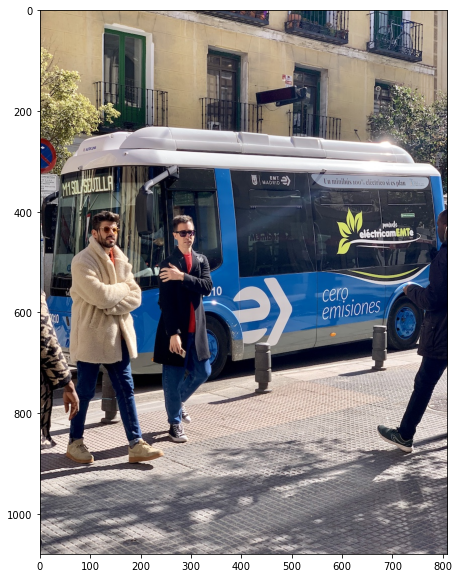

In [6]:
# Show the first image in the list
img_dir = os.path.join(base_imdir,filenames[0])
img = cv2.imread(img_dir)

plt.figure(figsize=[20,10])
plt.imshow(img[:,:,::-1])
plt.show()

In [7]:
print("PyTorch {} and Torchvision {} on ({})".format(torch.__version__,torchvision.__version__,torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'))

if torch.__version__.split('+')[-1] != torchvision.__version__.split('+')[-1]:
    print("Incompatible versions of pytorch and torchvision for YoLo-v5")

PyTorch 1.8.1+cu111 and Torchvision 0.9.1+cu111 on (GeForce RTX 2070)


In [15]:
# Load model from torch hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /home/noone/.cache/torch/hub/master.zip

                 from  n    params  module                                  arguments                     
  0                -1  1      3520  models.common.Focus                     [3, 32, 3]                    
  1                -1  1     18560  models.common.Conv                      [32, 64, 3, 2]                
  2                -1  1     18816  models.common.C3                        [64, 64, 1]                   
  3                -1  1     73984  models.common.Conv                      [64, 128, 3, 2]               
  4                -1  1    156928  models.common.C3                        [128, 128, 3]                 
  5                -1  1    295424  models.common.Conv                      [128, 256, 3, 2]              
  6                -1  1    625152  models.common.C3                        [256, 256, 3]                 
  7                -1  1   1

Adding autoShape... 


In [9]:
# List images to infer
imgs = []
imgs = [os.path.join(base_imdir,image) for image in filenames]

print("The number of images to run inference into is {}".format(len(imgs)))

The number of images to run inference into is 4


In [16]:
# Do the inference
results = model(imgs, size=640)

In [17]:
# Results
results.print()
results.save()

image 1/4: 1080x810 4 persons, 1 bus
image 2/4: 528x696 2 persons, 1 bus
image 3/4: 720x1280 3 persons, 1 tie
image 4/4: 434x768 1 chair, 1 couch, 1 bed, 2 books
Speed: 2.8ms pre-process, 4.8ms inference, 1.5ms NMS per image at shape (4, 3, 640, 640)
(669, 432)
(810, 874)
(221, 413)
(347, 860)
(49, 395)
(224, 885)
(7, 226)
(809, 735)
(0, 540)
(75, 884)
Saved image0.jpg,(49, 75)
(682, 494)
(440, 196)
(509, 258)
(368, 200)
(420, 265)
 image1.jpg,(749, 41)
(1148, 705)
(131, 195)
(1103, 710)
(430, 430)
(512, 717)
(1, 600)
(122, 718)
 image2.jpg,(499, 172)
(684, 376)
(438, 372)
(539, 422)
(0, 207)
(279, 429)
(500, 168)
(679, 373)
(324, 363)
(406, 404)
 image3.jpg to runs/hub/exp5


In [18]:
# Directory where experiments of inferenced images are saved
inf_dir = os.path.join(root,"runs/hub")

# Search for the latest experiment directory
# List all the experiment dirs
(_, exp_dirs, _) = next(os.walk(inf_dir))

# Impute a 0 for the first experiment, which does not come with a number
exp_dirs[0] = "exp0"

# Run through all the experiment directories and extract the order
all_exp=[int(exp_dir.split("exp")[-1]) for exp_dir in exp_dirs if len(exp_dirs) > 1]

# Select the last experiment dir
last_exp = max(all_exp)
last_exp_dir = os.path.join(inf_dir,"exp"+str(last_exp))

# Lookup all files in the experiment directory
(_, _, inf_files) = next(os.walk(last_exp_dir))

# List the images with its full path
inf_imgs = []
inf_imgs = [os.path.join(last_exp_dir,image) for image in inf_files]

/home/noone/smartcatalonia-2021/lector-matricules/runs/hub/exp5/image2.jpg
/home/noone/smartcatalonia-2021/lector-matricules/runs/hub/exp5/image0.jpg
/home/noone/smartcatalonia-2021/lector-matricules/runs/hub/exp5/image3.jpg
/home/noone/smartcatalonia-2021/lector-matricules/runs/hub/exp5/image1.jpg


<ipython-input-19-0a33b23440d4>:7: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


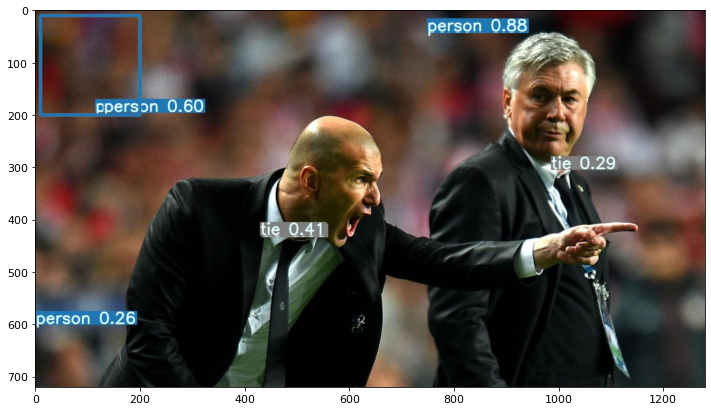

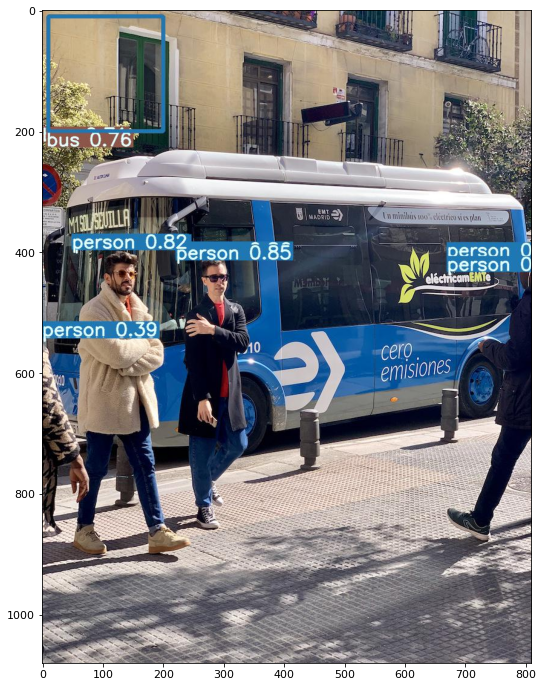

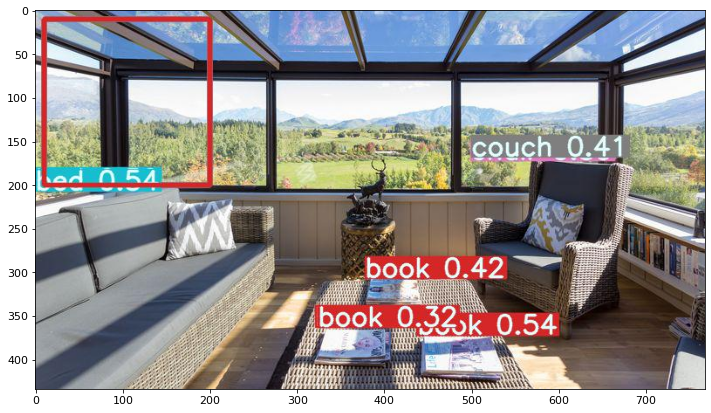

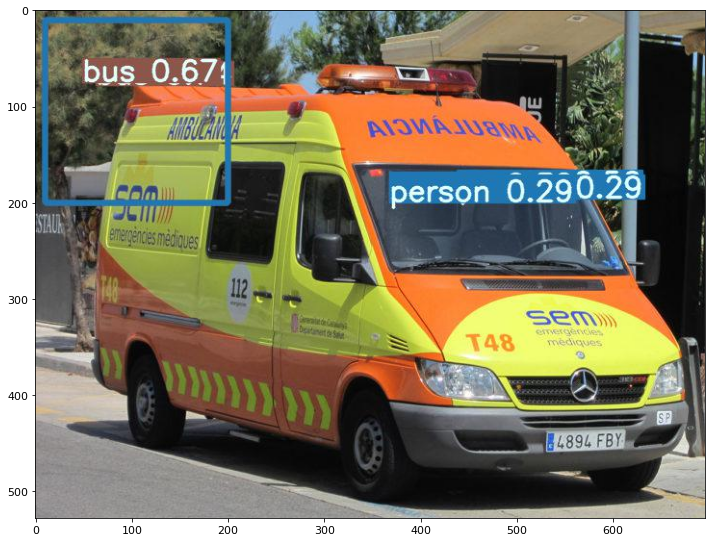

In [19]:
# Show all the images
for i,image in enumerate(inf_imgs):
    print(image)
    fig = plt.figure(figsize=(12,12))
    img = cv2.cvtColor(cv2.imread(image),cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

In [20]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 5784, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 5784 (delta 2), reused 1 (delta 0), pack-reused 5770
Receiving objects: 100% (5784/5784), 8.30 MiB | 7.10 MiB/s, done.
Resolving deltas: 100% (3939/3939), done.
/home/noone/smartcatalonia-2021/lector-matricules/yolov5
Note: you may need to restart the kernel to use updated packages.


In [21]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.8.1+cu111 (GeForce RTX 2070)


In [29]:
!python detect.py --weights yolov5x.pt --img 640 --conf 0.5 --source /home/noone/smartcatalonia-2021/lector-matricules/images

Namespace(weights=['yolov5x.pt'], source='/home/noone/smartcatalonia-2021/lector-matricules/images', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False)
YOLOv5 🚀 v5.0-14-g238583b torch 1.8.1+cu111 CUDA:0 (GeForce RTX 2070, 7982.3125MB)

Fusing layers... 
Model Summary: 476 layers, 87730285 parameters, 0 gradients, 218.8 GFLOPS
image 1/4 /home/noone/smartcatalonia-2021/lector-matricules/images/ambulancia-sem-696x528.jpg: 512x640 1 truck, Done. (0.035s)
image 2/4 /home/noone/smartcatalonia-2021/lector-matricules/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.032s)
image 3/4 /home/noone/smartcatalonia-2021/lector-matricules/images/zidane.jpg: 384x640 2 persons, 1 tie, Done. (0.027s)
image 4/4 /home/noone/smartcatalonia-2021/lector-matricules/images/zoom-bg02.jpg: 384x640 1 chair, 1 couch, 3 books, Done. (0

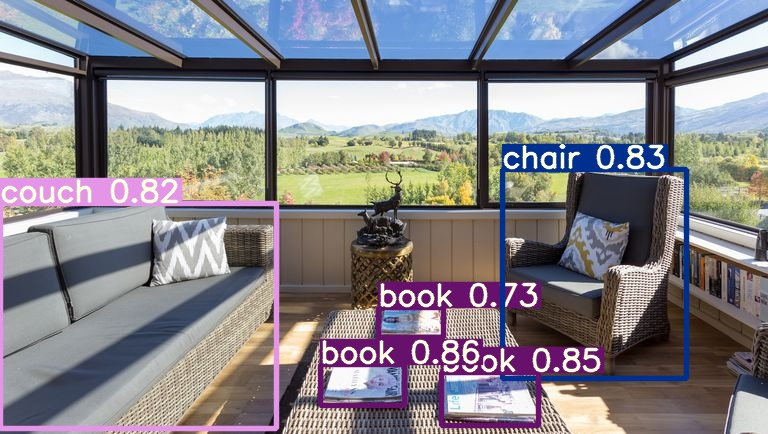

In [32]:
Image(filename='runs/detect/exp7/zoom-bg02.jpg', width=600)

In [34]:
# Install kaggle package for dataset downloading
!pip install kaggle --upgrade --quiet

In [52]:
os.chdir(root)

if not os.path.isdir("datasets"):
    os.mkdir("datasets")

os.chdir("datasets")

# Download kaggle dataset for license plate detection
if not os.path.isdir("car-plate-detection"):
    os.mkdir("car-plate-detection")

os.chdir("car-plate-detection")
!kaggle datasets download -d andrewmvd/car-plate-detection

 99%|███████████████████████████████████████▊| 202M/203M [00:18<00:00, 11.5MB/s]
100%|████████████████████████████████████████| 203M/203M [00:18<00:00, 11.3MB/s]


In [53]:
# Extract the files
!unzip -q car-plate-detection.zip
!rm car-plate-detection.zip

In [ ]:
# Read xml file into a dictionary

In [ ]:
# Convert dictionary to DF and export as CSV